In [2]:
###Required packages
import numpy as np
from hyperopt import hp, fmin, tpe
from scikits.odes.ode import ode
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

## BayesOpt Method Tuning

### Runtime Experiments

In [9]:
#Parse timing output data

runtime_data = pd.DataFrame()

with open('toy_runtimes.txt') as f:
    lines = f.readlines()

total_times = []
rates = []
for l in lines:
    if l[:3] == '100':
        total_times.append(l.split('[')[1].split('<')[0])
        rates.append(l.split('[')[1].split(', ')[1].split('t')[0])
rates = [float(rates[i].split('s')[0]) for i in range(len(rates))]

total_times_s = []
for i in range(len(total_times)):
    if len(total_times[i]) <= 5:
        total_times_s.append(60*float(total_times[i].split(':')[0]) + float(total_times[i].split(':')[1]))
    else: total_times_s.append(60*60*float(total_times[i].split(':')[0]) + 60*float(total_times[i].split(':')[1]) + float(total_times[i].split(':')[2]))

parsed = pd.DataFrame({'Model':'Toy', 'Rates':rates, 'Runtime': total_times_s})
runtime_data = pd.concat([runtime_data, parsed])


with open('ga_runtimes.txt') as f:
    lines = f.readlines()

total_times = []
rates = []
for l in lines:
    if l[:3] == '100':
        total_times.append(l.split('[')[1].split('<')[0])
        rates.append(l.split('[')[1].split(', ')[1].split('t')[0])
rates = [float(rates[i].split('s')[0]) for i in range(len(rates))]

total_times_s = []
for i in range(len(total_times)):
    if len(total_times[i]) <= 5:
        total_times_s.append(60*float(total_times[i].split(':')[0]) + float(total_times[i].split(':')[1]))
    else: total_times_s.append(60*60*float(total_times[i].split(':')[0]) + 60*float(total_times[i].split(':')[1]) + float(total_times[i].split(':')[2]))

parsed = pd.DataFrame({'Model':'Glucaric Acid', 'Rates':rates, 'Runtime': total_times_s})
runtime_data = pd.concat([runtime_data, parsed])

with open('fa_runtimes.txt') as f:
    lines = f.readlines()

total_times = []
rates = []
for l in lines:
    if l[:3] == '100':
        total_times.append(l.split('[')[1].split('<')[0])
        rates.append(l.split('[')[1].split(', ')[1].split('t')[0])
rates = [float(rates[i].split('s')[0]) for i in range(len(rates))]

total_times_s = []
for i in range(len(total_times)):
    if len(total_times[i]) <= 5:
        total_times_s.append(60*float(total_times[i].split(':')[0]) + float(total_times[i].split(':')[1]))
    else: total_times_s.append(60*60*float(total_times[i].split(':')[0]) + 60*float(total_times[i].split(':')[1]) + float(total_times[i].split(':')[2]))

parsed = pd.DataFrame({'Model':'Fatty Acid', 'Rates':rates, 'Runtime': total_times_s})
runtime_data = pd.concat([runtime_data, parsed])


with open('pas_runtimes.txt') as f:
    lines = f.readlines()

total_times = []
rates = []
for l in lines:
    if l[:3] == '100':
        total_times.append(l.split('[')[1].split('<')[0])
        rates.append(l.split('[')[1].split(', ')[1].split('t')[0])
rates = [float(rates[i].split('s')[0]) for i in range(len(rates))]

total_times_s = []
for i in range(len(total_times)):
    if len(total_times[i]) <= 5:
        total_times_s.append(60*float(total_times[i].split(':')[0]) + float(total_times[i].split(':')[1]))
    else: total_times_s.append(60*60*float(total_times[i].split(':')[0]) + 60*float(total_times[i].split(':')[1]) + float(total_times[i].split(':')[2]))

parsed = pd.DataFrame({'Model':'P-Aminostyrene', 'Rates':rates, 'Runtime': total_times_s})
runtime_data = pd.concat([runtime_data, parsed])

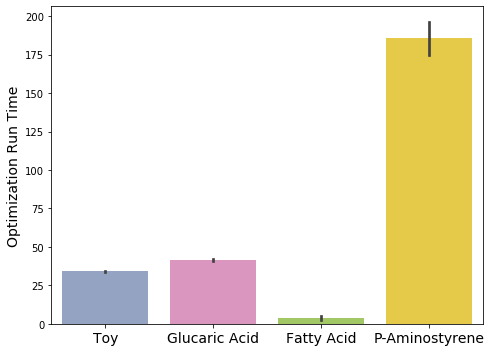

In [67]:
###FIGURE: Average Runtime bar plot 
pal = sns.color_palette("Set2")[2:6]
fig, axs = plt.subplots(1,1,figsize=(7, 5))
palettes = ['Reds', 'Oranges', 'Greens', 'Blues']

ax = axs
sns.barplot(data=runtime_data, y='Runtime', x='Model', palette=pal, ax=ax)
ax.set_ylabel('Optimization Run Time', fontsize=14)
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=14)
fig.tight_layout()
fig.savefig('runtime.png', dpi=300)

### Convergence Experiments

In [3]:
toy_background = pd.read_csv('../toy_model/background.csv')
ga_background = pd.read_csv('../glucaric_acid/background.csv')
fa_background = pd.read_csv('../fatty_acid/parameter_robustness.csv')
pas_background = pd.read_csv('../p_aminostyrene/background.csv')

#Recompute best loss on non-error samples
start=0
stop=1000
new_pas_background = pd.DataFrame()
for j in range(100):
    landscape = pas_background.iloc[start:stop].reset_index(drop=True)
    best_loss = 1E5
    best_circuit = 'Initial'
    best_losses = []
    best_losses_circuits = []
    for i in range(len(landscape)):
        if landscape.loss[i] < best_loss and landscape.loss[i] != 0:
            best_loss = landscape.loss[i]
            best_circuit = landscape.circuit[i]
        best_losses.append(best_loss)
        best_losses_circuits.append(best_circuit)
    landscape['best_losses'] = best_losses
    landscape['best_loss_circuit'] = best_losses_circuits 
    new_pas_background = pd.concat([new_pas_background, landscape])
    start = stop
    stop += 1000
pas_background = new_pas_background.loc[new_pas_background.loss != 0]

start=0
stop=1000
new_ga_background = pd.DataFrame()
for j in range(100):
    landscape = ga_background.iloc[start:stop].reset_index(drop=True)
    best_loss = 1E5
    best_circuit = 'Initial'
    best_losses = []
    best_losses_circuits = []
    for i in range(len(landscape)):
        if landscape.loss[i] < best_loss and landscape.loss[i] != 0:
            best_loss = landscape.loss[i]
            best_circuit = landscape.circuit[i]
        best_losses.append(best_loss)
        best_losses_circuits.append(best_circuit)
    landscape['best_losses'] = best_losses
    landscape['best_loss_circuit'] = best_losses_circuits 
    new_ga_background = pd.concat([new_ga_background, landscape])
    start = stop
    stop += 1000
ga_background = new_ga_background.loc[new_ga_background.loss != 0]


FileNotFoundError: [Errno 2] No such file or directory: '../fatty_acid/parameter_robustness.csv'

In [24]:
#For each iteration, find iteration which achieves best loss and best loss within 1% and 10% tolerance.
start = 0
stop = 500
conv_data = pd.DataFrame()
for i in range(100):
    iteration = toy_background.iloc[start:stop].reset_index(drop=True)
    best_loss = iteration.best_losses.min()
    best_loss_1tol = best_loss + 0.01*best_loss
    best_loss_10tol = best_loss + 0.1*best_loss
    conv_time = iteration.loc[iteration.best_losses == best_loss].index.min()
    conv_time_1tol = iteration.loc[iteration.best_losses < best_loss_1tol].index.min()
    conv_time_10tol = iteration.loc[iteration.best_losses < best_loss_10tol].index.min()

    conv_time_iteration = pd.DataFrame({'Model':'Toy', 'Circuit':iteration.Circuit.unique()[0], 'conv_time':[conv_time, conv_time_1tol, conv_time_10tol], 'tolerance':[0, 1, 10]})
    conv_data = pd.concat([conv_data, conv_time_iteration])

    start = stop
    stop += 500

start = 0
stop = 1000
for i in range(100):
    iteration = ga_background.iloc[start:stop].reset_index(drop=True)
    best_loss = iteration.best_losses.min()
    best_loss_1tol = best_loss + 0.01*best_loss
    best_loss_10tol = best_loss + 0.1*best_loss
    conv_time = iteration.loc[iteration.best_losses == best_loss].index.min()
    conv_time_1tol = iteration.loc[iteration.best_losses < best_loss_1tol].index.min()
    conv_time_10tol = iteration.loc[iteration.best_losses < best_loss_10tol].index.min()
    
    conv_time_iteration = pd.DataFrame({'Model':'Glucaric Acid', 'Circuit':iteration.Circuit.unique()[0], 'conv_time':[conv_time, conv_time_1tol, conv_time_10tol], 'tolerance':[0, 1, 10]})
    conv_data = pd.concat([conv_data, conv_time_iteration])
    #separate by architecture
    start = stop
    stop += 1000

start = 0
stop = 500
for i in range(100):
    iteration = fa_background.iloc[start:stop].reset_index(drop=True)
    best_loss = iteration.best_losses.min()
    best_loss_1tol = best_loss + 0.01*best_loss
    best_loss_10tol = best_loss + 0.1*best_loss
    conv_time = iteration.loc[iteration.best_losses == best_loss].index.min()
    conv_time_1tol = iteration.loc[iteration.best_losses < best_loss_1tol].index.min()
    conv_time_10tol = iteration.loc[iteration.best_losses < best_loss_10tol].index.min()
    
    conv_time_iteration = pd.DataFrame({'Model':'Fatty Acid', 'Circuit':iteration.circuit.unique()[0], 'conv_time':[conv_time, conv_time_1tol, conv_time_10tol], 'tolerance':[0, 1, 10]})
    conv_data = pd.concat([conv_data, conv_time_iteration])
    start = stop
    stop += 500
    
start = 0
stop = 1000
for i in range(100):
    iteration = pas_background.iloc[start:stop].reset_index(drop=True)
    best_loss = iteration.best_losses.min()
    best_loss_1tol = best_loss + 0.01*best_loss
    best_loss_10tol = best_loss + 0.1*best_loss
    conv_time = iteration.loc[iteration.best_losses == best_loss].index.min()
    conv_time_1tol = iteration.loc[iteration.best_losses < best_loss_1tol].index.min()
    conv_time_10tol = iteration.loc[iteration.best_losses < best_loss_10tol].index.min()
    
    conv_time_iteration = pd.DataFrame({'Model':'P-Aminostyrene', 'Circuit':iteration.Circuit.unique()[0], 'conv_time':[conv_time, conv_time_1tol, conv_time_10tol], 'tolerance':[0, 1, 10]})
    conv_data = pd.concat([conv_data, conv_time_iteration])

    start = stop
    stop += 1000


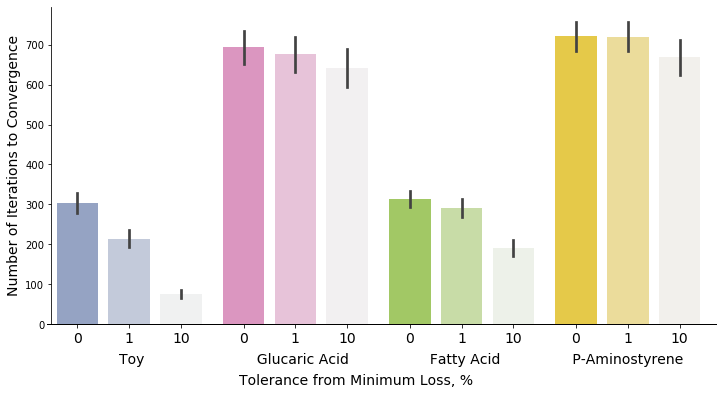

In [68]:
###Figure: Convergence Time by architecture and circuit
pal = sns.color_palette("Set2")[2:6]

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharey=True)
for i in range(4):
    ax = axs[i]
    sns.barplot(data=conv_data.loc[conv_data.Model == conv_data.Model.unique()[i]], y='conv_time', x='tolerance', palette=sns.light_palette(pal[i], 3, reverse=True), ax=ax)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    if i != 0: 
        ax.spines['left'].set_visible(False) 
        ax.set_ylabel('')
        axs[i].tick_params(axis='y', which='both',left=False)
    ax.set_xlabel('')  
    ax.tick_params(axis='x', labelsize=14)

axs[0].set_ylabel('Number of Iterations to Convergence', fontsize=14)
fig.text(0.5, -0.08, 'Tolerance from Minimum Loss, %', ha='center', fontsize=14)
fig.text(0.17, -0.02, 'Toy                         Glucaric Acid                  Fatty Acid                P-Aminostyrene', ha='left', fontsize=14)
fig.add_artist(Line2D([0.07, 1], [0.09, 0.09], color='k', linewidth=1))
fig.tight_layout()
fig.savefig('convergence.png', dpi=300)
    

### Hyperparameter Tuning Experiments

In [4]:
gamma10 = pd.read_csv('gamma10.csv')
gamma25 = pd.read_csv('gamma25.csv')
gamma50 = pd.read_csv('gamma50.csv')
gamma90 = pd.read_csv('gamma90.csv')

In [5]:
#For each gamma setting
hyp_data = pd.DataFrame()
gammvals = [10, 25, 50, 90]
gammas = [gamma10, gamma25, gamma50, gamma90]
for i in range(4):
    g = gammas[i]
    #Divide into quarters
    quarter1 = g.iloc[0:500]
    quarter2 = g.iloc[500:1000]
    quarter3 = g.iloc[1000:1500]
    quarter4 = g.iloc[1500:2000]

    #Compute DC fraction for each quarter
    dc_fractions = [len(q.loc[q.Circuit == 'Dual Control'])/500 for q in [quarter1, quarter2, quarter3, quarter4]]
    
    hyp_iteration = pd.DataFrame({'Gamma':gammvals[i], 'majority_fraction':dc_fractions, 'quarter':[1, 2, 3, 4]})
    hyp_data = pd.concat([hyp_data, hyp_iteration])
hyp_data = hyp_data.reset_index(drop=True)

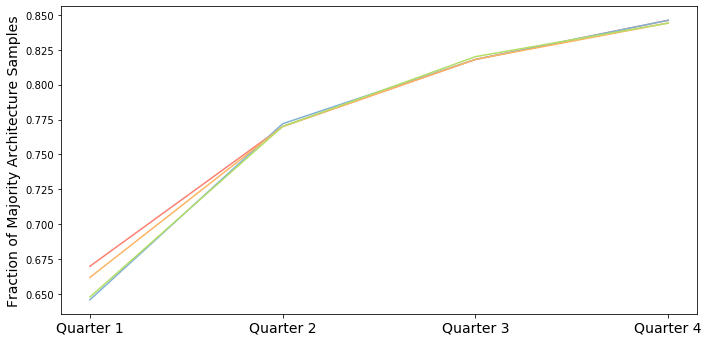

In [18]:
###FIGURE: Line plot of majority fraction over time
pal = sns.color_palette("Set3")[3:7]
fig, axs = plt.subplots(1,1,figsize=(10, 5))
ax = axs
sns.lineplot(data=hyp_data, y='majority_fraction', x='quarter', hue='Gamma', palette=pal, ax=ax, legend=False)
ax.set_ylabel('Fraction of Majority Architecture Samples', fontsize=14)
ax.set_xlabel('')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'])
ax.tick_params(axis='x', labelsize=14)
fig.tight_layout()

fig.savefig('hyperparameter_line.png', dpi=300)

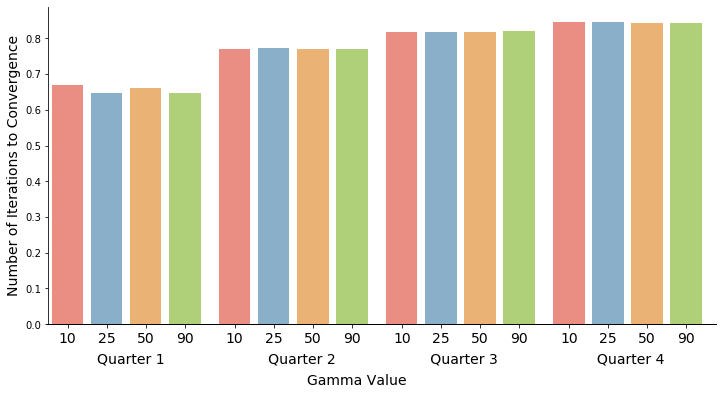

In [27]:
###FIGURE: Bar graph of majority fractions over time
pal = sns.color_palette("Set3")[3:7]
palettes = np.array([sns.light_palette(pal[i], 4) for i in range(4)])
fig, axs = plt.subplots(1,4,figsize=(10, 5), sharey=True)
for i in range(4):
    ax = axs[i]
    sns.barplot(data=hyp_data.loc[hyp_data.quarter == i+1], y='majority_fraction', x='Gamma', palette=pal, ax=ax)
    fig.tight_layout()
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    if i != 0: 
        ax.spines['left'].set_visible(False) 
        ax.set_ylabel('')
        axs[i].tick_params(axis='y', which='both',left=False)
    ax.set_xlabel('')  
    ax.tick_params(axis='x', labelsize=14)

axs[0].set_ylabel('Number of Iterations to Convergence', fontsize=14)
fig.text(0.14, -0.02, 'Quarter 1                       Quarter 2                     Quarter 3                      Quarter 4', ha='left', fontsize=14)
fig.add_artist(Line2D([0.07, 1], [0.09, 0.09], color='k', linewidth=1))
fig.text(0.5, -0.08, 'Gamma Value', ha='center', fontsize=14)
fig.tight_layout()
fig.savefig('hyperparameter_bar.png', dpi=300)

array([[0.98431373, 0.50196078, 0.44705882],
       [0.50196078, 0.69411765, 0.82745098],
       [0.99215686, 0.70588235, 0.38431373],
       [0.70196078, 0.87058824, 0.41176471]])